In [9]:
import pandas as pd
import numpy as np
from gtda.homology import CubicalPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints, ComplexPolynomial, PersistenceLandscape, HeatKernel, Silhouette, BettiCurve, PairwiseDistance, ForgetDimension


In [63]:
import cv2
# open images as grayscale image
im_gray1 = cv2.imread('label1.png', cv2.IMREAD_GRAYSCALE)
im_gray3 = cv2.imread('label3.png', cv2.IMREAD_GRAYSCALE)
im_gray5 = cv2.imread('label5.png', cv2.IMREAD_GRAYSCALE)

# Important! Transform image with [None, :, :]
im_gray1 = im_gray1[None, :, :]
im_gray3 = im_gray3[None, :, :]
im_gray5 = im_gray5[None, :, :]


In [64]:
""" Tried this as an additional step but it worked worse
from gtda.images import Binarizer

binarizer = Binarizer(threshold=0.33)
im_gray1 = binarizer.fit_transform(im_gray1)
im_gray3 = binarizer.fit_transform(im_gray3)
im_gray5 = binarizer.fit_transform(im_gray5)

from gtda.images import RadialFiltration

radial_filtration = RadialFiltration(center=np.array([200, 300]))
im_gray1 = radial_filtration.fit_transform(im_gray1)

radial_filtration.plot(im_gray1, colorscale="jet")
"""

' Tried this as an additional step but it worked worse\nfrom gtda.images import Binarizer\n\nbinarizer = Binarizer(threshold=0.33)\nim_gray1 = binarizer.fit_transform(im_gray1)\nim_gray3 = binarizer.fit_transform(im_gray3)\nim_gray5 = binarizer.fit_transform(im_gray5)\n\nfrom gtda.images import RadialFiltration\n\nradial_filtration = RadialFiltration(center=np.array([200, 300]))\nim_gray1 = radial_filtration.fit_transform(im_gray1)\n\nradial_filtration.plot(im_gray1, colorscale="jet")\n'

In [65]:
ph = CubicalPersistence(homology_dimensions=(0, 1, 2), n_jobs=-1)

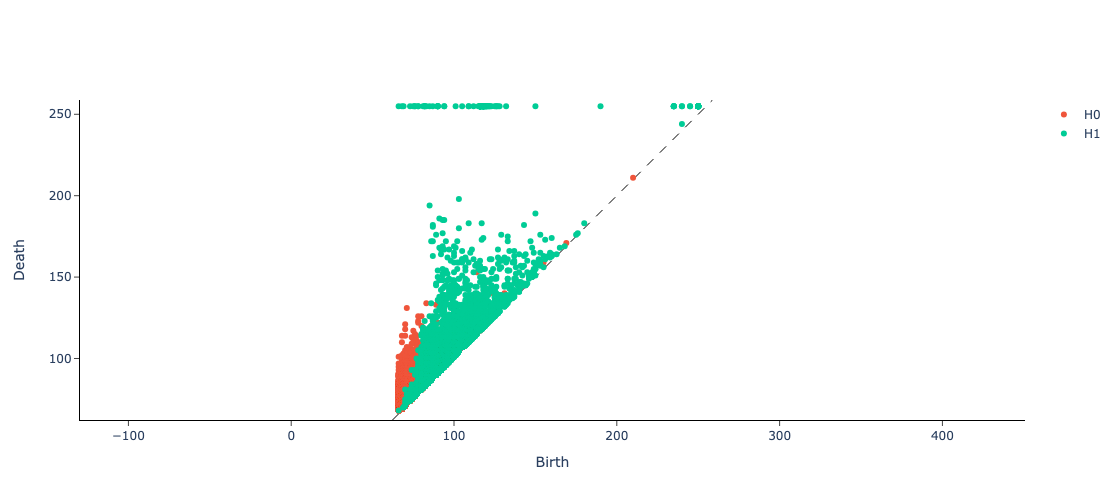

In [66]:
diagram_1 = ph.fit_transform_plot(im_gray1, homology_dimensions=(0, 1, 2))

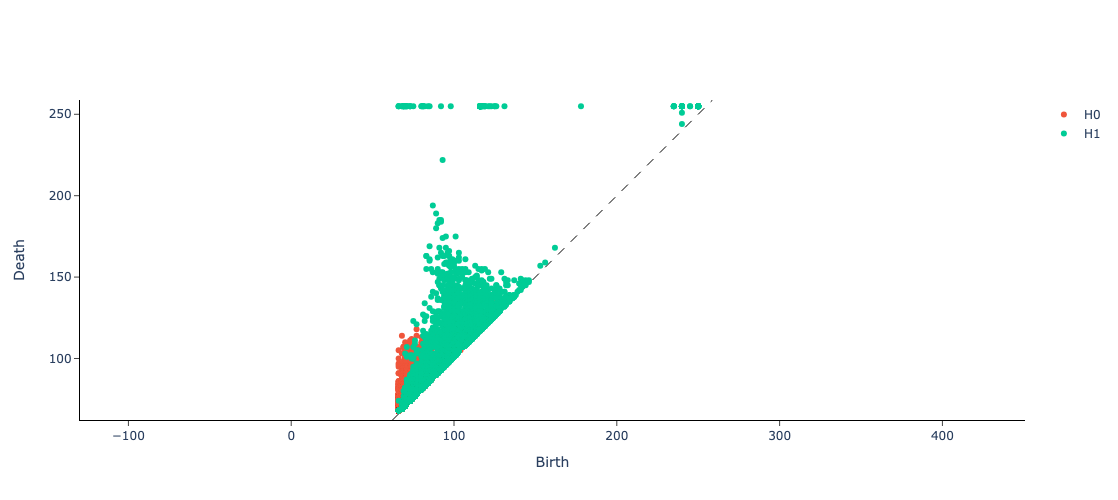

In [67]:
diagram_3 = ph.fit_transform_plot(im_gray3[None, :, :], homology_dimensions=(0, 1, 2))

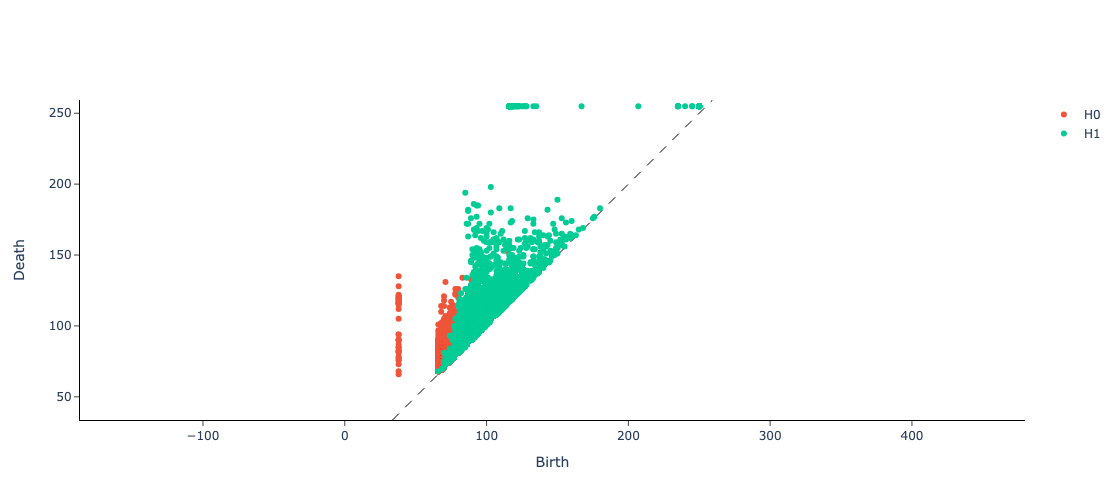

In [68]:
diagram_5 = ph.fit_transform_plot(im_gray5[None, :, :], homology_dimensions=(0, 1, 2))

In [69]:
# These are the features that we will examine for the persistence diagrams of each label
PE = PersistenceEntropy()
AM = Amplitude()
NP = NumberOfPoints()
CP = ComplexPolynomial()

In [70]:
persistence_entropy1 = {}
amplitude1 = {}
no_points1 = {}

persistence_entropy1 = PE.fit_transform(diagram_1)
amplitude1 = AM.fit_transform(diagram_1)
no_points1 = NP.fit_transform(diagram_1)

print(persistence_entropy1)
print(amplitude1)
print(no_points1)

[[12.04413096 10.91316761 -1.        ]]
[[162.51062477 750.03223071   0.        ]]
[[5635 4312    0]]


In [71]:
persistence_entropy3 = {}
amplitude3 = {}
no_points3 = {}

persistence_entropy3 = PE.fit_transform(diagram_3)
amplitude3 = AM.fit_transform(diagram_3)
no_points3 = NP.fit_transform(diagram_3)

print(persistence_entropy3)
print(amplitude3)
print(no_points3)

[[11.75101756 10.36185442 -1.        ]]
[[110.94640838 750.03223071   0.        ]]
[[4959 3501    0]]


In [72]:
persistence_entropy5 = {}
amplitude5 = {}
no_points5 = {}

persistence_entropy5 = PE.fit_transform(diagram_5)
amplitude5 = AM.fit_transform(diagram_5)
no_points5 = NP.fit_transform(diagram_5)

print(persistence_entropy5)
print(amplitude5)
print(no_points5)

[[11.98792286 11.01669393 -1.        ]]
[[283.24419575 544.89541797   0.        ]]
[[5668 4269    0]]


Ideally, the summary statistics for label 5 should lie somewhere in between label 1 and 3, which is not the case.
I could still try to compute the Wavelet Transforms on single segments, but am not hoping much. 
(Also check if I named the files with the correct labels)